In [2]:

import pandas as pd
import numpy as np

# Load the dataset
file_path = 'heart-disease.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Check for missing values
missing_values = data.isnull().sum()

# Verify the columns exist in the DataFrame
columns_to_convert = ['cp', 'restecg', 'slope', 'thal']
missing_columns = [col for col in columns_to_convert if col not in data.columns]

if missing_columns:
    print(f"Columns not found in the DataFrame: {missing_columns}")
else:
    # Convert categorical variables into dummy/indicator variables
    data = pd.get_dummies(data, columns=columns_to_convert, drop_first=True)

    # Display the first few rows of the modified dataset and missing values
    print(data.head())
    print(missing_values)




Columns not found in the DataFrame: ['cp', 'restecg', 'slope', 'thal']


In [7]:
avg_age_with_disease = data[data['target'] == 1]['age'].mean()
avg_age_without_disease = data[data['target'] == 0]['age'].mean()

avg_age_with_disease, avg_age_without_disease


(52.4969696969697, 56.60144927536232)

In [8]:
cp_distribution = data[['cp_1', 'cp_2', 'cp_3']].sum()

cp_distribution


cp_1    50
cp_2    87
cp_3    23
dtype: int64

In [9]:
correlation_thalach_age = data[['thalach', 'age']].corr().iloc[0, 1]

correlation_thalach_age


-0.3985219381210683

In [10]:
sex_heart_disease = data.groupby('sex')['target'].mean()

sex_heart_disease


sex
0    0.750000
1    0.449275
Name: target, dtype: float64

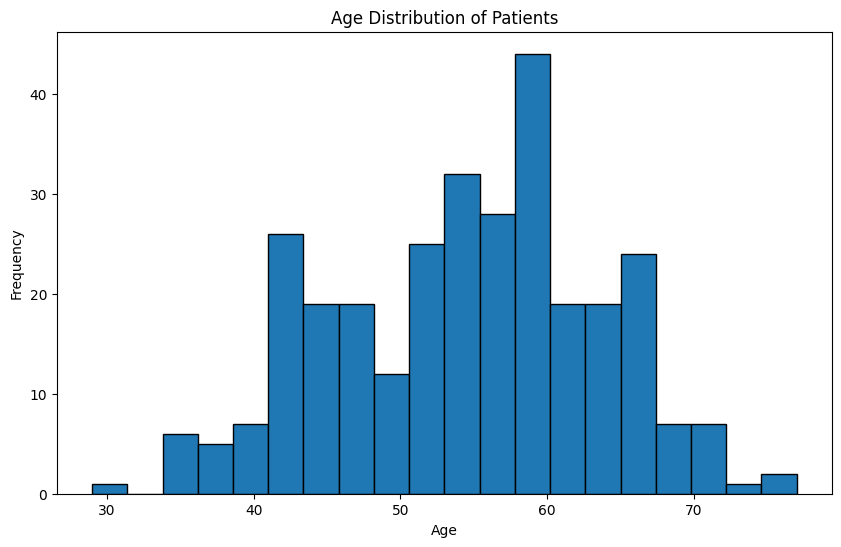

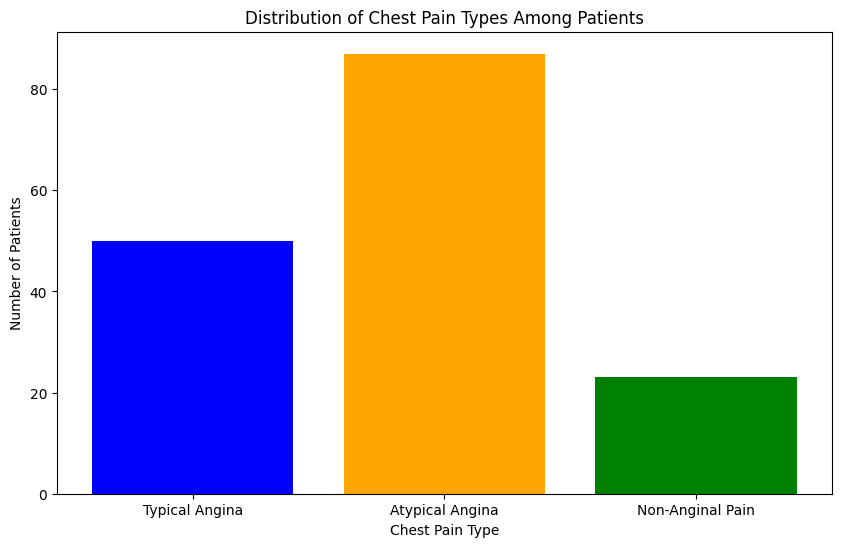

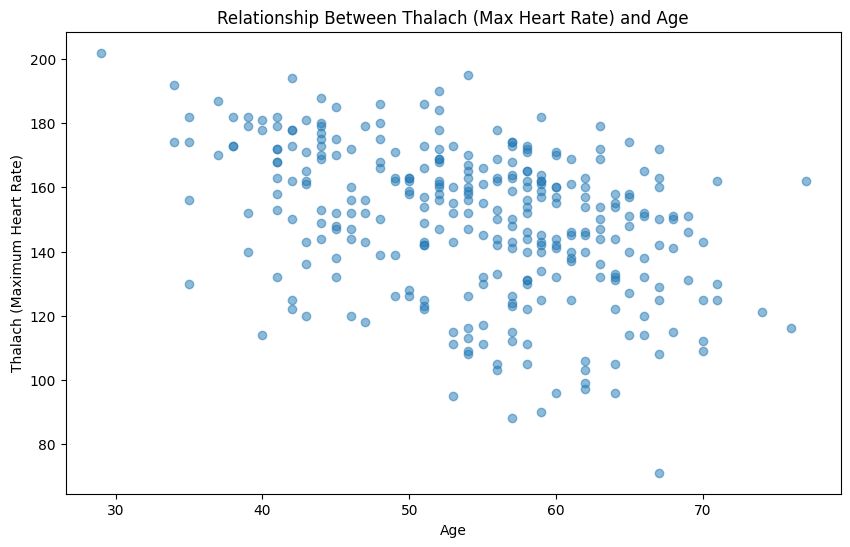

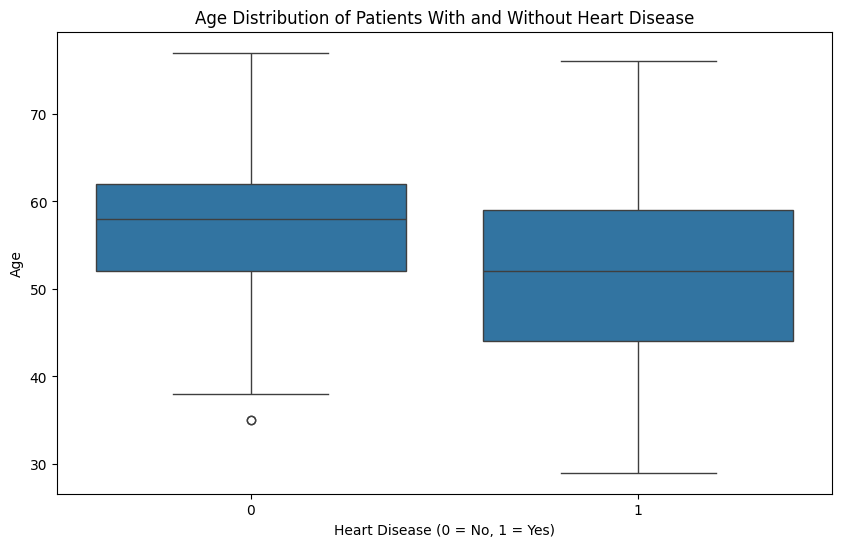

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of the age distribution of patients
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Create a bar chart showing the distribution of chest pain types among patients
cp_labels = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain']
plt.figure(figsize=(10, 6))
plt.bar(cp_labels, cp_distribution, color=['blue', 'orange', 'green'])
plt.title('Distribution of Chest Pain Types Among Patients')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.show()

# Plot a scatter plot to show the relationship between thalach (maximum heart rate) and age
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['thalach'], alpha=0.5)
plt.title('Relationship Between Thalach (Max Heart Rate) and Age')
plt.xlabel('Age')
plt.ylabel('Thalach (Maximum Heart Rate)')
plt.show()

# Create a box plot to compare the age distribution of patients with and without heart disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=data)
plt.title('Age Distribution of Patients With and Without Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


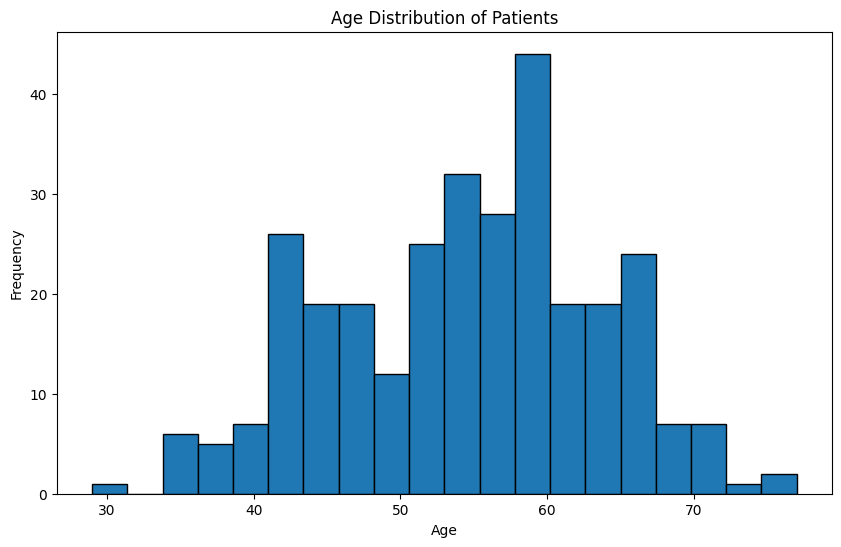

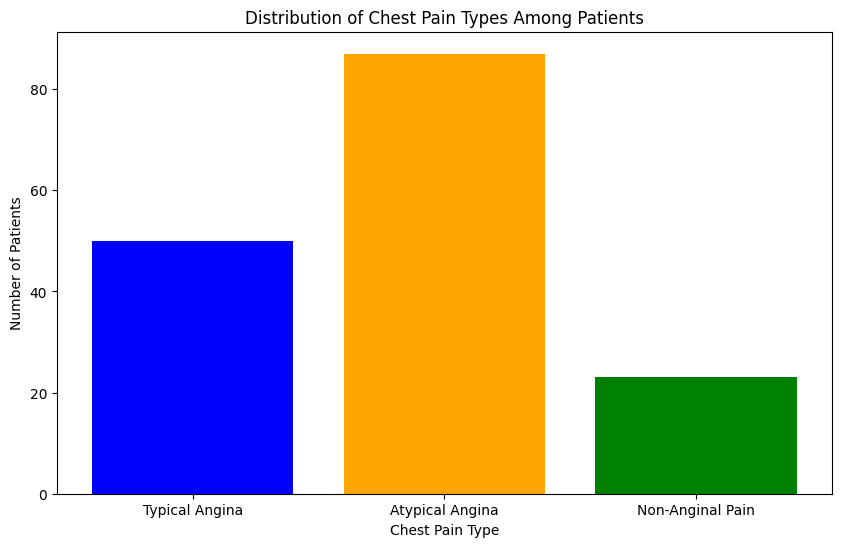

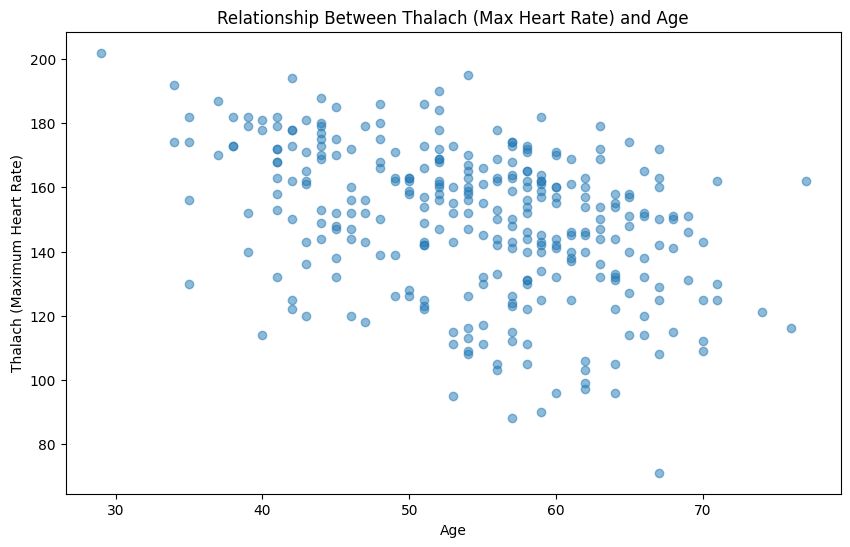

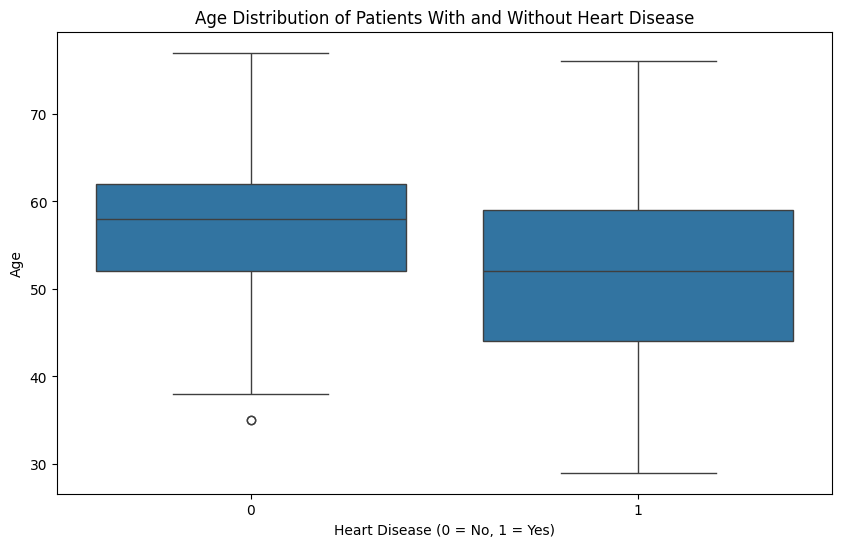

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of the age distribution of patients
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=20, edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Create a bar chart showing the distribution of chest pain types among patients
cp_labels = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain']
plt.figure(figsize=(10, 6))
plt.bar(cp_labels, cp_distribution, color=['blue', 'orange', 'green'])
plt.title('Distribution of Chest Pain Types Among Patients')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.show()

# Plot a scatter plot to show the relationship between thalach (maximum heart rate) and age
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['thalach'], alpha=0.5)
plt.title('Relationship Between Thalach (Max Heart Rate) and Age')
plt.xlabel('Age')
plt.ylabel('Thalach (Maximum Heart Rate)')
plt.show()

# Create a box plot to compare the age distribution of patients with and without heart disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='age', data=data)
plt.title('Age Distribution of Patients With and Without Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


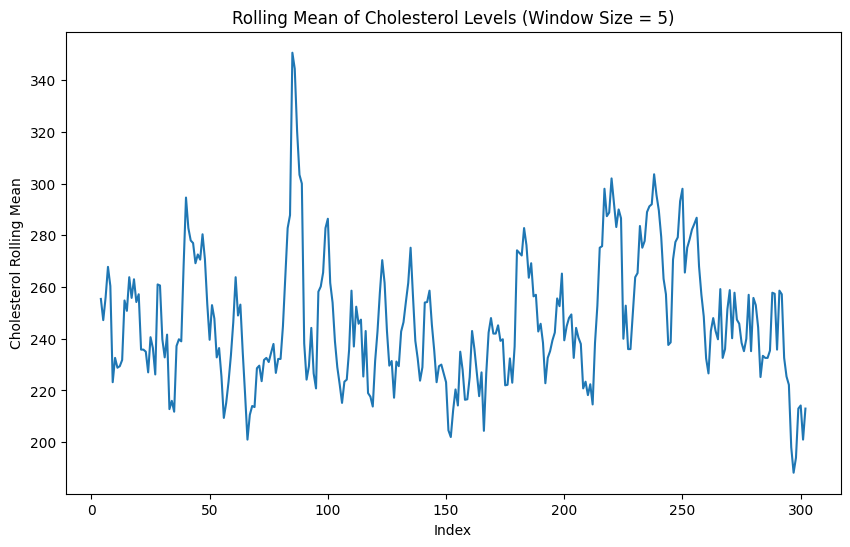

In [15]:
import numpy as np

# Calculate the correlation matrix for all numerical features in the dataset
correlation_matrix = data.corr()

# Perform a rolling mean analysis on the chol (cholesterol) levels with a window size of 5 and plot it
data['chol_rolling_mean'] = data['chol'].rolling(window=5).mean()

plt.figure(figsize=(10, 6))
plt.plot(data['chol_rolling_mean'])
plt.title('Rolling Mean of Cholesterol Levels (Window Size = 5)')
plt.xlabel('Index')
plt.ylabel('Cholesterol Rolling Mean')
plt.show()
